<a href="https://colab.research.google.com/github/AlexLeoShin/SeminarGit/blob/main/%D0%94%D0%B0%D1%82%D0%B0%D1%81%D0%B5%D1%82%2C_%D0%98%D0%BD%D1%82%D0%B5%D1%80%D0%BD%D0%B5%D1%82_%D0%BC%D0%B0%D0%B3%D0%B0%D0%B7%D0%B8%D0%BD_(%D0%BF%D1%80%D0%BE%D0%B4%D0%B0%D0%B6%D0%B8)_%D0%A8%D0%BB%D1%8E%D0%BF%D0%BA%D0%B8%D0%BD_%D0%90_%D0%9B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Домашнее задание №1. Модуль 5. Анализ данных и визуализация**

##**Задание №1**

*Создать датасет с 3 категориальными, 3 числовыми и 1 признаком дата/время на тему "Продажи интернет-магазина". Сформулировать гипотезу о зависимости между признаками, проверить ее с помощью визуализации и сделать выводы.*

##**Решение задания №1:**
## Создание датасета Интернет-магазин (продажи)

### Подзадача:
*Подключение библиотек*

In [1]:
#импорт библиотек pandas для работы с данными и numpy для генерации случайных чисел и массивов
import pandas as pd
import numpy as np

np.random.seed(42)

*Создаем датасет с 3 категориальными, 3 числовыми и 1 признаком дата/времяв соответствии с темой «Продажи в интернет-магазине».*

In [3]:
# Создание 3х категорийных признаков (Категории, Подкатегории, Регион)
category = np.random.choice(['Электроника', 'Одежда', 'Дом и быт', 'Красота', 'Спорт'],
                            size=100, replace=True)
subcategory = np.random.choice(['Смартфоны', 'Ноутбуки', 'Футболки', 'Джинсы',
                                'Посуда', 'Мебель', 'Косметика', 'Уход за кожей',
                                'Тренажеры', 'Спортивная одежда'],
                               size=100, replace=True)
region = np.random.choice(['Север', 'Юг', 'Восток', 'Запад'],
                          size=100, replace=True)

# Создание 3х числовых признаков (Цена, Скидка, Продажи(кол-во))
price = np.round(np.random.uniform(100, 50000, size=100), 2) #(диапазон от 100 до 50000, из 100 случайных чисел)
discount = np.round(np.random.uniform(0, 0.5, size=100), 2) #скидка от 0% до 50%
units_sold = np.random.randint(1, 200, size=100)

# Создание признака дата/время
# Создаём массив дат, начиная с '2024-01-01' и далее 100 дней с частотой в один день ('D').
# Получаем даты покупок в течение 100 дней (periods)
date_of_purchase = pd.date_range(start='2024-01-01', periods=100, freq='D')

# Создание датасета
data = {
    'category': category,
    'subcategory': subcategory,
    'region': region,
    'price': price,
    'discount': discount,
    'units_sold': units_sold,
    'date_of_purchase': date_of_purchase
}

df = pd.DataFrame(data)

# вывод нескольких строк датасета на экран
display(df.head())

,category,subcategory,region,price,discount,units_sold,date_of_purchase
0,Спорт,Ноутбуки,Восток,364.47,0.30,67,2024-01-01
1,Дом и быт,Мебель,Восток,48755.85,0.28,187,2024-01-02
2,Красота,Мебель,Восток,24588.36,0.36,72,2024-01-03
3,Спорт,Футболки,Восток,36172.52,0.30,54,2024-01-04
4,Красота,Ноутбуки,Восток,41060.99,0.41,67,2024-01-05


## Формулировка гипотезы

Гипотеза может заключаться в том, что **скидка (discount)**, предлагаемая на продукт, может повлиять на **количество продаж (units_sold)**. Более высокие скидки потенциально могут привести к увеличению количества продаваемых единиц, (распространенная взаимосвязь к изучению продажах).


## Проверка гипотезы

*Визуализация данных для проверки сформулированной гипотезы*.


*Импортируем библиотеки для построения графиков.*

**Matplotlib** базовая библиотека для визуализации, а *Seaborn* для построения эстетически приятного графика.

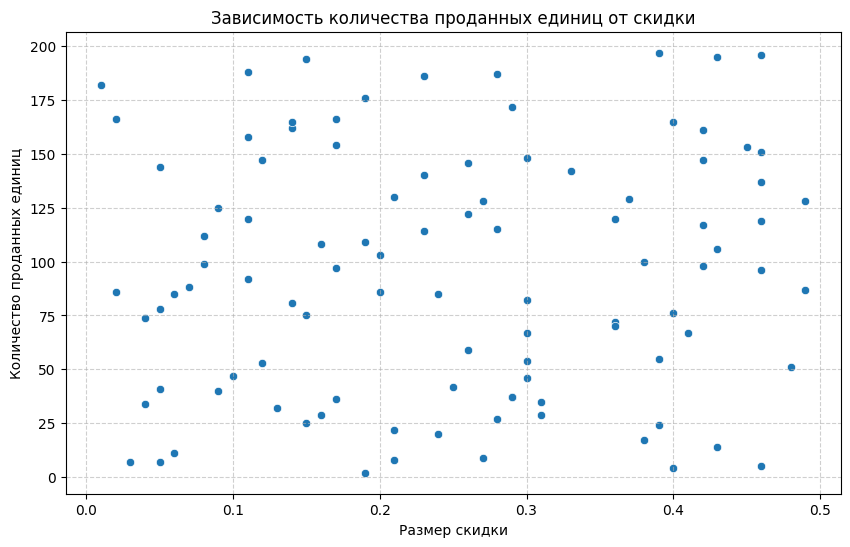

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6)) #cоздадим фигуру для графика с размерами 10x6 дюймов

# Строим точечную диаграмму (scatterplot) с использованием seaborn.
# По оси X откладываем значения discount, по оси Y - units_sold.
# data=df указывает, что данные берутся из нашего DataFrame df.
# Точечная диаграмма хорошо подходит для визуализации зависимости между двумя числовыми признаками.
sns.scatterplot(x='discount', y='units_sold', data=df)

# заголовки для графика и подписи осей x,y
plt.title('Зависимость количества проданных единиц от скидки')
plt.xlabel('Размер скидки')
plt.ylabel('Количество проданных единиц')

# сетка на график для облегчения считывания значений
plt.grid(True, linestyle='--', alpha=0.6)

# отображение графика
plt.show()

## Выводы по результатам проверки гипотезы.


In [ ]:
print("Выводы:")
print("На графике рассеяния не наблюдается явной линейной зависимости между размером скидки и количеством проданных единиц товара.")
print("Точки данных распределены довольно хаотично, что может указывать на отсутствие сильной прямой или обратной корреляции между этими двумя признаками в данном датасете.")
print("Таким образом, визуализация (в данном синтетическом датасете) не подтверждает сформулированную гипотезу о наличии явной зависимости.")

Выводы:
На графике рассеяния не наблюдается явной линейной зависимости между размером скидки и количеством проданных единиц товара.
Точки данных распределены довольно хаотично, что может указывать на отсутствие сильной прямой или обратной корреляции между этими двумя признаками в данном датасете.
Таким образом, визуализация (в данном синтетическом датасете) не подтверждает сформулированную гипотезу о наличии явной зависимости.


##**Ключевые выводы анализа данных**

**Набор данных**, созданный для «Продаж в интернет-магазине», включает в себя категориальные признаки (категория, подкатегория, регион), числовые характеристики (цена, скидка, количество продаж (units_sold)) и характеристику даты и времени (date_of_purchase).
*Сформулированная гипотеза такова*: Существует зависимость между размером скидки (discount) и количеством проданных единиц (units_sold).

**Точечная диаграмма**, визуализирующая связь между скидкой (discount) и кол-вом продаж (units_sold), не показала четкой линейной зависимости или сильной корреляции (конкретной зависимости) между этими двумя признаками в синтетически созданном нами датасете.

**Вывод:**

***Основываясь на визуализации, первоначальная гипотеза о сильной зависимости между скидкой и проданными единицами не была подтверждена этим конкретным синтетическим набором данных.***